# Reference
https://pythonfordatascience.org/
https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
http://www.tm.mahidol.ac.th/tropmed-km/sites/default/files/Re3_21022013.pdf?fbclid=IwAR3IELnxgAm7ANlzN80qqUjHT-ycUONkmJfaXJ8AA2imOeNwjkKA_LmBbj4

In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import researchpy as rp
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### MEASURES OF CENTRAL TENDENCY
- Mean is the average value of the data.
- Median is the middle number of the data.
- Mode is the number that occurs most in the data.

### MEASURES OF VARIABILITY
- Standard deviation tells how much deviation is present in the data, i.e. how spread out the numbers are from the mean value.
- Minimum value smallest number in the data.
- Maximum value largest number in the data.
- Range largest number – smallest number.
- Kurtosis is a measure of tailedness, it measures the sharpness of the peak.
- Skew is a measure of symmetry.

# Mann-Whitney U Test
nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution

- Fail to Reject H0: Sample distributions are equal.
- Reject H0: Sample distributions are not equal.  
For the test to be effective, it requires at least 20 observations in each data sample

scipy.stats.mannwhitneyu
Use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks. Mann-Whitney U is significant if the u-obtained is LESS THAN or equal to the critical value of U.

This test corrects for ties and by default uses a continuity correction. The reported p-value is for a one-sided hypothesis, to get the two-sided p-value multiply the returned p-value by 2.

In [38]:
pd.set_option('display.max_rows', 10) #show only 5 first and last data
df = pd.read_csv('https://github.com/Opensourcefordatascience/Data-sets/raw/master/blood_pressure.csv')
df[['bp_before', 'bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


In [39]:
df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


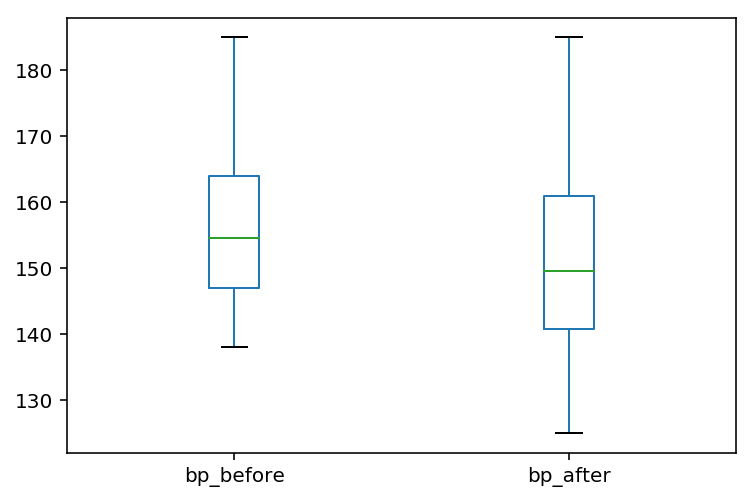

In [11]:
df[['bp_before', 'bp_after']].boxplot(grid=False);

In [17]:
df['bp_difference'] = df['bp_before'] - df['bp_after']
df['bp_difference'][df['bp_difference']==0] 
# differences that are equal to 0, need to be excluded from the ranking process (automatically)

41     0
74     0
103    0
115    0
Name: bp_difference, dtype: int64

In [41]:
df.groupby('sex').apply(lambda t: stats.mannwhitneyu(t.bp_before, t.bp_after))

sex
Female    (1212.5, 0.001023973830568029)
Male       (1561.0, 0.10521472912810931)
dtype: object

## Wilcoxon Sign-Ranked Test (Wilcoxon T test)
non-parametric univariate test  
significant difference on scores when there is a “before” and “after” condition of some treatment or intervention  

### assumptions 
- The dependent variable (DV) must be continuous which is measured on an ordinal or continuous scale
- The paired observations are randomly and independently drawn
- The paired observations come from the same population

### The hypothesis being test is:
- Null hypothesis (H0): The difference between the pairs follows a symmetric distribution around zero.
- Alternative hypothesis (HA): The difference between the pairs does not follow a symmetric distribution around zero.

scipy.stats.wilcoxon() 
Because the normal approximation is used for the calculations, the samples used should be large. A typical rule is to require that n > 20.

In [18]:
stats.wilcoxon(df['bp_difference'])

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)

In [19]:
stats.wilcoxon(df['bp_before'], df['bp_after'])

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)

The blood pressure before the intervention was higher (M= 156.45 ± 11.39 units) compared to the blood pressure post intervention (M= 151.36 ± 14.18 units); there was a statistically significant decrease in blood pressure (t=2,234.5, p= 0.0014).

In [28]:
from IPython.display import IFrame
IFrame("https://www.blopig.com/blog/wp-content/uploads/2013/10/Screen-Shot-2015-01-20-at-10.50.56-1024x453.png", width=500, height=475)

# Chi-square Test of Independence
relationship between two categorical variables

### Assumptions
- When testing the data, the cells should be counts of cases and not percentages. It is okay to convert to percentages after testing the data
- The levels (groups) of the variables being tested are mutually exclusive
- Each participant contributes to only one cell within the Chi-square table
- The groups being tested must be independent
- The value of expected cells should be greater than 5 for at least 20% of the cells

### The hypothesis being test is:
- The H0 (Null Hypothesis): There is no relationship between variable one and variable two.
- The H1 (Alternative Hypothesis): There is a relationship between variable 1 and variable 2.

In [44]:
df = pd.read_csv("mental-heath-in-tech.csv")
df

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [45]:
rp.summary_cat(df[['Do you currently have a mental health disorder?', 'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?' ]])

,Variable,Outcome,Count,Percent
0,Do you currently have a mental health disorder?,Yes,575,40.13
1,,No,531,37.06
2,,Maybe,327,22.82
3,Would you have been willing to discuss a menta...,Some of my previous employers,654,51.74
4,,"No, at none of my previous employers",416,32.91
5,,I don't know,101,7.99
6,,"Yes, at all of my previous employers",93,7.36


In [46]:
def drop_maybe(series):
    if series.lower() == 'yes' or series.lower() == 'no':
        return series
    else:
        return

In [47]:
df['current_mental_disorder'] = df['Do you currently have a mental health disorder?'].apply(drop_maybe)
df['willing_discuss_mh_supervisor'] = df['Would you have been willing to discuss a mental health issue with your direct supervisor(s)?']  
rp.summary_cat(df[['current_mental_disorder', 'willing_discuss_mh_supervisor']])

,Variable,Outcome,Count,Percent
0,current_mental_disorder,Yes,575,51.99
1,,No,531,48.01
2,willing_discuss_mh_supervisor,Some of my previous employers,654,51.74
3,,"No, at none of my previous employers",416,32.91
4,,I don't know,101,7.99
5,,"Yes, at all of my previous employers",93,7.36


In [49]:
crosstab = pd.crosstab(df['willing_discuss_mh_supervisor'], df['current_mental_disorder'])
crosstab

current_mental_disorder,No,Yes
willing_discuss_mh_supervisor,,
I don't know,51,29
"No, at none of my previous employers",119,194
Some of my previous employers,237,267
"Yes, at all of my previous employers",51,24


In [50]:
stats.chi2_contingency(crosstab)

(32.408194625396376,
 4.292859793048239e-07,
 3,
 array([[ 37.69547325,  42.30452675],
        [147.48353909, 165.51646091],
        [237.48148148, 266.51851852],
        [ 35.33950617,  39.66049383]]))

The first value (32.408) is the Chi-square value, followed by the p-value (4.29e-07), then comes the degrees of freedom (3), and lastly it outputs the expected frequencies as an array.  
Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05.

In [51]:
table, results = rp.crosstab(df['willing_discuss_mh_supervisor'], df['current_mental_disorder'], prop= 'col', test= 'chi-square')
table

current_mental_disorder                
                                                          No     Yes     All
willing_discuss_mh_supervisor                                               
I don't know                                           11.14    5.64    8.23
No, at none of my previous employers                   25.98   37.74   32.20
Some of my previous employers                          51.75   51.95   51.85
Yes, at all of my previous employers                   11.14    4.67    7.72
All                                                   100.00  100.00  100.00

In [52]:
results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,32.4082
1,p-value =,0.0000
2,Cramer's V =,0.1826


Cramer’s V which is an effect size measure. This tells how strong the relationship between the two variables are.  
statistically significant relationship between having a current mental health disorder and the willingness to discuss mental health with supervisor, χ2(3)= 32.4082, p < 0.0001. The strength of that relationship is small, Cramer's V= 0.1826.

In [53]:
dummies = pd.get_dummies(df['willing_discuss_mh_supervisor'])
dummies.drop(["I don't know"], axis= 1, inplace= True)
dummies.head()

,"No, at none of my previous employers",Some of my previous employers,"Yes, at all of my previous employers"
0,0,1,0
1,0,1,0
2,0,0,0
3,0,1,0
4,0,1,0


In [55]:
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df['current_mental_disorder'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}Expected= {expected}{nl}")

current_mental_disorder                No  Yes
No, at none of my previous employers          
0                                     412  381
1                                     119  194 

Chi2 value= 16.906443844118506
p-value= 3.926805158610076e-05
Degrees of freedom= 1
Expected= [[380.72603978 412.27396022]
 [150.27396022 162.72603978]]

current_mental_disorder         No  Yes
Some of my previous employers          
0                              294  308
1                              237  267 

Chi2 value= 0.2924156694554503
p-value= 0.5886766550070441
Degrees of freedom= 1
Expected= [[289.02531646 312.97468354]
 [241.97468354 262.02531646]]

current_mental_disorder                No  Yes
Yes, at all of my previous employers          
0                                     480  551
1                                      51   24 

Chi2 value= 12.034595567813462
p-value= 0.0005222216393205276
Degrees of freedom= 1
Expected= [[494.99186257 536.00813743]
 [ 36.00813743  38.99186257]]
